In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rc

In [10]:
pokemon = pd.read_csv("../bases/pokemon2.csv", index_col=0)

In [11]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
pokemon.shape

(800, 12)

In [13]:
pokemon.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [14]:
pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.0,6.0


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

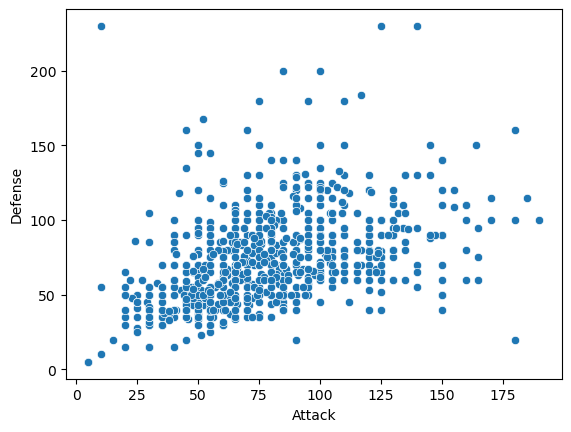

In [15]:
#Scatterplot
sns.scatterplot(x = "Attack", y = "Defense", data = pokemon)

# Hexplot

Um gráfico hexagonal adiciona pontos no espaço em hexágonos e, em seguida, colore esses hexágonos com base nos valores dentro deles.

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

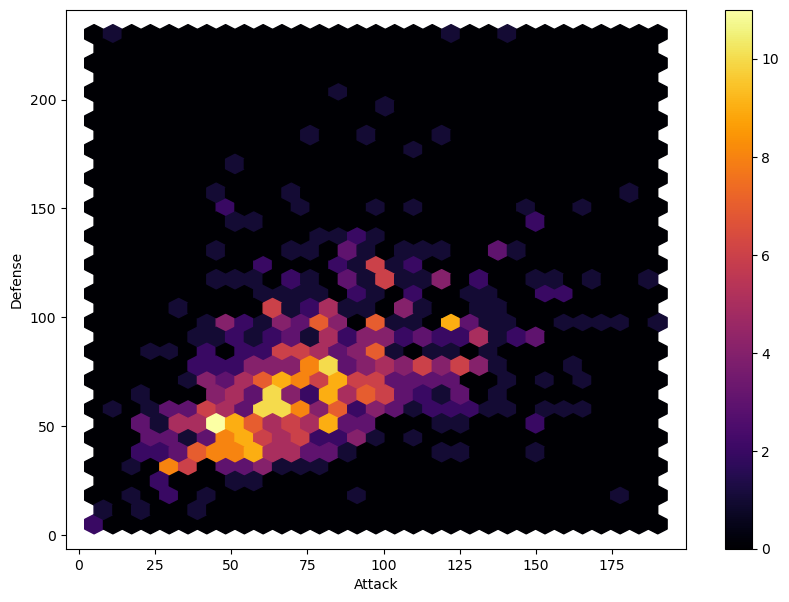

In [16]:
plt.rcParams['figure.figsize'] = (10, 7)
pokemon.plot.hexbin(x='Attack', y='Defense', gridsize = 30, cmap='inferno')

In [17]:
#Filtramos la data y realizamos una agrupacion
pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]
pokemon_stats_legendary

Attack     Defense
Legendary Generation                        
False     1            74.981250   70.175000
          2            70.693069   72.118812
          3            76.971831   69.901408
          4            79.620370   75.074074
          5            78.246667   70.486667
          6            70.459459   74.013514
True      1           120.833333   89.166667
          2            99.000000   99.000000
          3           118.333333  107.222222
          4           109.846154  103.538462
          5           120.266667   90.733333
          6           125.250000  101.375000

<AxesSubplot:xlabel='Legendary,Generation'>

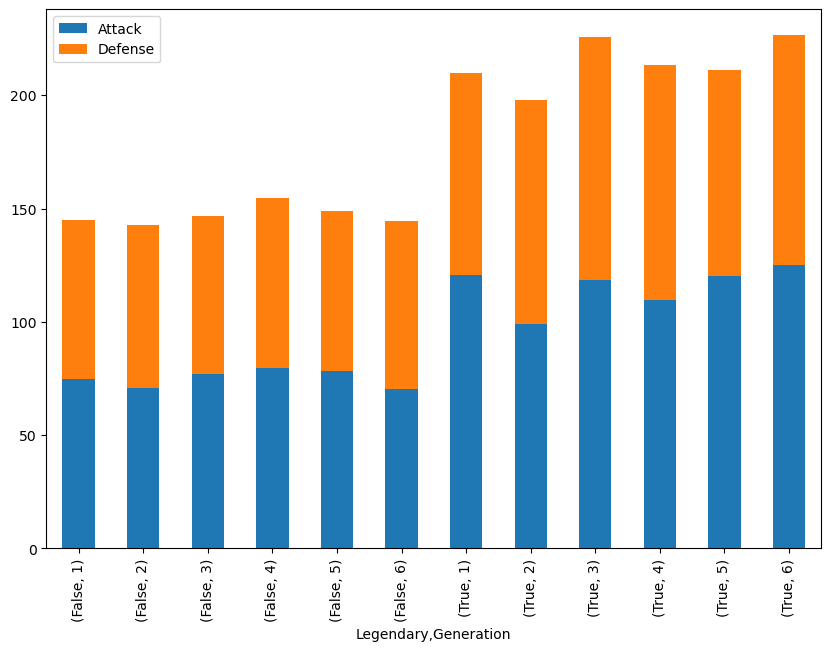

In [18]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [19]:
#Generamos otro dataset
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
2,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
3,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
4,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788
6,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024


<AxesSubplot:xlabel='Generation'>

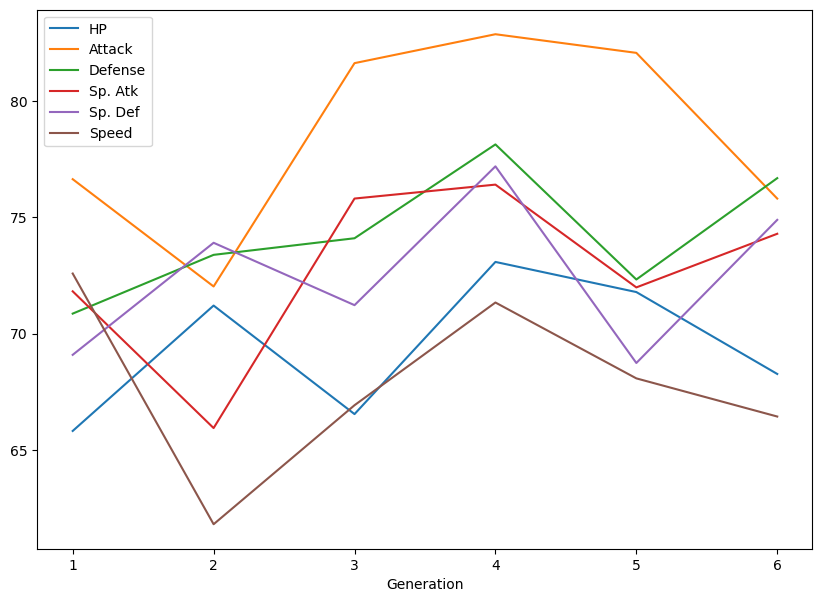

In [20]:
pokemon_stats_by_generation.plot.line()